<a href="https://colab.research.google.com/github/Abdelrahman-Hashemm/simple-sequential---functional---sub_class-models-for-mnist-data-set/blob/main/Convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import needed liberaries**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import *
from tensorflow.keras.preprocessing.image import *
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
#from matplotlib import pyplot as plt

# establish link to our drive to get the data set 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_directory = '/content/drive/My Drive/smile_dataset'

# Now let's split the data into train & validation

In [11]:
batch_size = 64
img_height = 64
img_width = 64
# Split data itnto train van validation 
training = tf.keras.utils.image_dataset_from_directory(
  data_directory,
  validation_split=0.3,
  subset="training",
  seed=130,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13166 files belonging to 2 classes.
Using 9217 files for training.


In [5]:
validation = tf.keras.utils.image_dataset_from_directory(
data_directory,
  validation_split=0.3,
  subset="validation",
  seed=130,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13166 files belonging to 2 classes.
Using 3949 files for validation.


# **now let's show some samples from the data **

Our two classes of data is: ['negative', 'positive']


<ipython-input-6-e9268e87fc5b>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(330 + i + 1)


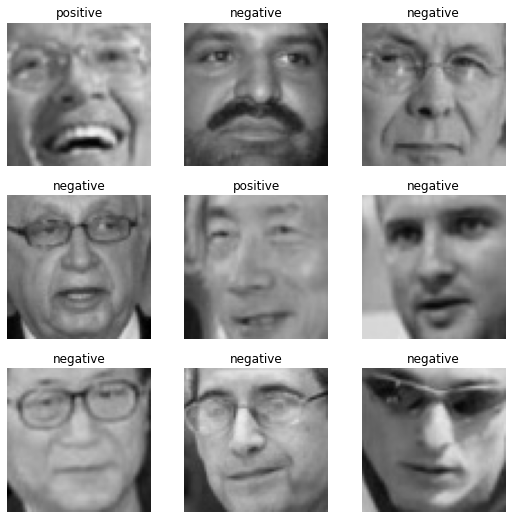

In [6]:
from tensorflow.python import train
#Found 13166 files belonging to 2 classes. let's show our two classes
data_classes = training.class_names
print(f'Our two classes of data is: {data_classes}')

#let's plot a samble from images 
plt.figure(figsize = (9,9))
for images, labels in training.take(3):
  for i in range(9):
    ax = plt.subplot(330 + i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(data_classes[labels[i]])
    plt.axis("off")

# **Now let's build our model CNN**

In [7]:
from keras.layers import BatchNormalization
def my_cnn_model():
    input_layer = Input(shape=(64, 64, 3))
    x = Conv2D(filters=20, kernel_size=(5, 5), padding='same', strides=(1, 1))(input_layer)
    x = ELU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = Dropout(0.4)(x)
    x = Conv2D(filters=50,  kernel_size=(5, 5), padding='same', strides=(1, 1))(x)
    x = ELU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = Dropout(0.4)(x)
    x = Flatten()(x)
    x = Dense(units=500)(x)
    x = ELU()(x)
    x = Dropout(0.4)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output)
    return model

In [8]:
# create an object from the model 
model = my_cnn_model()

model.summary()

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization/gamma:0' shape=(20,) dtype=float32>
  <tf.Variable 'batch_normalization/beta:0' shape=(20,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_1), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_1/gamma:0' shape=(50,) dtype=float32>
  <tf.Variable 'batch_normalization_1/beta:0' shape=(50,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 20)        1520      
_________________________________________________________________
elu (ELU)                    (None, 64, 64, 20)        0         
_________________________________________________________________
tf.cast (TFOpLambda)         (None, 64, 64, 20)        0         
_________________________________________________________________
tf.compat.v1.nn.fused_batch_ ((None, 64, 64, 20), (20, 0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 20)        0     

In [12]:
# compile model 
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

epoch_num = 10
model.fit(training,
          validation_data=validation,
          epochs=epoch_num,
          batch_size=batch_size,
          )

Epoch 1/10
145/145 [==============================] - 157s 1s/step - loss: 0.4353 - accuracy: 0.8264 - val_loss: 0.2867 - val_accuracy: 0.8858
Epoch 2/10
145/145 [==============================] - 139s 953ms/step - loss: 0.4303 - accuracy: 0.8426 - val_loss: 0.3833 - val_accuracy: 0.7908
Epoch 3/10
145/145 [==============================] - 138s 947ms/step - loss: 0.4152 - accuracy: 0.8446 - val_loss: 0.3207 - val_accuracy: 0.8800
Epoch 4/10
145/145 [==============================] - 140s 963ms/step - loss: 0.3847 - accuracy: 0.8579 - val_loss: 0.2608 - val_accuracy: 0.8931
Epoch 5/10
145/145 [==============================] - 138s 951ms/step - loss: 0.3556 - accuracy: 0.8646 - val_loss: 0.2500 - val_accuracy: 0.9035
Epoch 6/10
145/145 [==============================] - 138s 950ms/step - loss: 0.3466 - accuracy: 0.8687 - val_loss: 0.3000 - val_accuracy: 0.8686
Epoch 7/10
145/145 [==============================] - 138s 951ms/step - loss: 0.3717 - accuracy: 0.8737 - val_loss: 1.9322 - va